In [1]:
### find the person diabetic or not

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
df=pd.read_csv('pima-indians-diabetes-2.csv')

In [4]:
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe(include='all')

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [7]:
df.shape

(768, 9)

In [8]:
df.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [9]:
df['class'].value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      0
2      1
3      0
4      1
5      0
6      1
7      0
8      1
9      1
10     0
11     1
12     0
13     1
14     1
15     1
16     1
17     1
18     0
19     1
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     0
28     0
29     0
30     0
31     1
32     0
33     0
34     0
35     0
36     0
37     1
38     1
39     1
40     0
41     0
42     0
43     1
44     0
45     1
46     0
47     0
48     1
49     0
50     0
51     0
52     0
53     1
54     0
55     0
56     1
57     0
58     0
59     0
60     0
61     1
62     0
63     0
64     1
65     0
66     1
67     0
68     0
69     0
70     1
71     0
72     1
73     0
74     0
75     0
76     0
77     0
78     1
79     0
80     0
81     0
82     0
83     0
84     1
85     0
86     0
87     0
88     1
89     0
90     0
91     0
92     0
93     1
94     0
95     0
96     0
97     0
98     0
99     1
100    1
101    0
102    0
103    0
104    0
105    0
10

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
Y=df['class']
X=df.drop(["class"],axis=1)

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [15]:
model1=LogisticRegression()

In [16]:
model1.fit(X_train,Y_train)

LogisticRegression()

In [17]:
model1.score(X_train,Y_train)

0.7728119180633147

In [18]:
model1.score(X_test,Y_test)

0.7835497835497836

In [19]:
predictions=model1.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,predictions)

0.7835497835497836

In [21]:
from sklearn import metrics
print (metrics.classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.78      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,predictions)

array([[132,  14],
       [ 36,  49]], dtype=int64)

<Axes: >

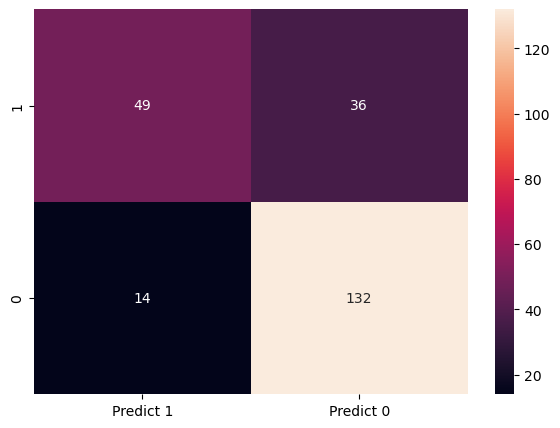

In [23]:
cm=metrics.confusion_matrix(Y_test,predictions,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in ['1','0']],
                  columns=[i for i in['Predict 1','Predict 0']])
plt.figure(figsize= (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [24]:
49+36+14+132

231

In [25]:
df.shape

(768, 9)

In [26]:
768*0.3

230.39999999999998

In [27]:
(49+132)/230  ## (TP+TP)/AVG

0.7869565217391304

In [ ]:
### plas-plasma,pres-pressure,skin-thickness,test-insulin,mass-bmi,pedi-pedgree function,
##  values canot be zero there will be a missing values

In [ ]:
### missing value respresented by zero, whereever zero replace with mean or median

In [30]:
df.sample()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
760,2,88,58,26,16,28.4,0.766,22,0


In [31]:
median1=df['Plas'].median()
median1

117.0

In [32]:
df['Plas']=df['Plas'].replace(np.nan,median1)

In [33]:
median1=df['Pres'].median()
median1

72.0

In [34]:
df['Pres']=df['Pres'].replace(np.nan,median1)

In [35]:
median1=df['skin'].median()
median1

23.0

In [36]:
df['skin']=df['skin'].replace(np.nan,median1)

In [37]:
median1=df['test'].median()
median1

30.5

In [38]:
df['test']=df['test'].replace(np.nan,median1)

In [39]:
median1=df['mass'].median()
median1

32.0

In [40]:
df['mass']=df['mass'].replace(np.nan,median1)

In [41]:
median1=df['pedi'].median()
median1

0.3725

In [42]:
df['pedi']=df['pedi'].replace(np.nan,median1)

In [43]:
df.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [44]:
df.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64